In [1]:
import pandas as pd
import numpy as np

data can be downloaded here:
https://zenodo.org/records/7554815#.ZF-dztLMK-Y

In [2]:
frame = pd.read_csv("/home/zuko/Environments/env_pca/Bacteremia_public_S2.csv", index_col='ID')
frame.sort_index(inplace=True)

In [3]:
# si le nom d'une variable finit par "R" il s'agit de "Rate" ce sont des taux
#dérivés d'une autre variable déjà présente par ailleurs
l_rates = [i for i in frame.columns if i[-1] == 'R'] #si colonne finit par R on recupère
for i in l_rates: 
    if i[:-1] not in frame.columns:
       print(f"{i} n'a pas de correspondant brut") 
    else:
        print(f"{i} possede un correspondant")

frame.drop(columns = l_rates+['WBC', 'HCT'], inplace = True) #on supprimme les colonnes qui sont derivées d'autres variables
del l_rates

BASOR possede un correspondant
EOSR possede un correspondant
LYMR possede un correspondant
MONOR possede un correspondant
NEUR possede un correspondant


In [4]:
frame[:5].T

ID,1,3,5,7,9
SEX,2,1,1,1,2
AGE,62,72,46,84,38
MCV,99.3,85.1,96.3,91.3,85.1
HGB,11.5,10.3,7.4,10.3,13.7
PLT,307.0,182.0,64.0,309.0,183.0
MCH,31.5,26.0,31.2,30.4,30.2
MCHC,31.8,30.6,32.4,33.3,35.3
RDW,19.5,15.0,19.7,13.8,12.6
MPV,10.8,9.7,11.1,8.5,10.0
LYM,0.4,0.4,1.5,1.3,0.8


In [5]:
def colonnes_good(df, threshold=0):
    """enables retrieving columns thas have NO NANs"""
    for col in df.columns:
        if df[col].isnull().sum() == threshold:
            yield col, int(df[col].isnull().sum())

In [6]:
def colonnes_nan(df, threshold=0):
    """enables retrieving columns thas have NANs"""
    for col in df.columns:
        if df[col].isnull().sum() > threshold:
            yield col, int(df[col].isnull().sum())

In [7]:
liste_col_nan = list(colonnes_nan(frame))
sorted(liste_col_nan, key=lambda var: var[-1], reverse=True)[:10]

[('PAMY', 7114),
 ('TRIG', 5061),
 ('CHOL', 5045),
 ('GLU', 4192),
 ('AMY', 3913),
 ('LIP', 3699),
 ('HS', 3061),
 ('FIB', 2567),
 ('APTT', 2549),
 ('NT', 2467)]

In [8]:
liste_col_g = list(colonnes_good(frame))
liste_col_g

[('SEX', 0), ('AGE', 0), ('BloodCulture', 0)]

In [9]:
def compteur_nan(df, threshold=0):
    """enables retrieving indices of rows that have NANs"""
    for ind in df.index: #The index (row labels) of the DataFrame. (from documentation)
        nan_val = 0
        for value in df.loc[ind] :
            if pd.isna(value) == True:
                nan_val += 1
        if nan_val > threshold: #compter lignes avec NAN
            yield ind, int(df.loc[ind].isna().sum())#on veut examiner nombres nan par index

In [10]:
def compteur_good(df, threshold=0):
    """enables retrieving indices of rows that have NO NANs"""
    for ind in df.index: #The index (row labels) of the DataFrame. (from documentation)
        nan_val = 0
        for value in df.loc[ind] :
            if pd.isna(value) == True:
                nan_val += 1
        if nan_val == threshold: #compter lignes avec/ sans NAN
            yield ind #on veut examiner index des rows sans NAN

In [11]:
liste_ind_nan = list(compteur_nan(frame, threshold=0))
sorted(liste_ind_nan, key=lambda var: var[-1], reverse=True)[:40]

[(4337, 30),
 (22283, 30),
 (14938, 29),
 (62188, 29),
 (1095, 28),
 (1515, 28),
 (1700, 28),
 (1774, 28),
 (2467, 28),
 (3012, 28),
 (9080, 28),
 (10543, 28),
 (10993, 28),
 (13391, 28),
 (14913, 28),
 (16267, 28),
 (18196, 28),
 (18920, 28),
 (21117, 28),
 (23949, 28),
 (24425, 28),
 (26809, 28),
 (29088, 28),
 (32056, 28),
 (33973, 28),
 (34679, 28),
 (49018, 28),
 (49490, 28),
 (56843, 28),
 (58203, 28),
 (312, 27),
 (2276, 27),
 (2417, 27),
 (2605, 27),
 (4775, 27),
 (13426, 27),
 (15116, 27),
 (18143, 27),
 (26470, 27),
 (35160, 27)]

In [12]:
liste_ind_g = list(compteur_good(frame, threshold=0))
len(liste_ind_g)

3980

In [13]:
# combien y a-t-il des patients malades? 1180 patients
frame.loc[frame.loc[:, 'BloodCulture' ] == 'yes'].index

Index([   13,    52,    53,    97,   180,   194,   195,   226,   259,   276,
       ...
       62086, 62087, 62136, 62202, 62218, 62221, 62225, 62286, 62287, 62294],
      dtype='int64', name='ID', length=1180)

In [14]:
# frame clean est le frame complet sans NAN
frame_clean = frame.loc[liste_ind_g]
frame_clean.shape

(3980, 45)

### On créée pca_frame déjà ici

In [15]:
# on drop les var quali
pca_frame = frame_clean.copy().drop(columns = ['SEX', 'BloodCulture'])#, 'AGE'])# drop age?
pca_frame.sort_index(inplace=True)

In [ ]:
#pca_frame.describe().T

In [ ]:
#from sklearn.preprocessing import StandardScaler

#data = pca_frame.values
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(data)

In [ ]:
#scaled_df = pd.DataFrame(data=scaled_data, index=pca_frame.index, columns=pca_frame.columns)
#scaled_df.boxplot();

In [16]:
# on ne drop que SEX, (AGE?) mais remarque : BloodCultrure devient index
pca_frame_groups = frame_clean.copy().drop(columns = ['SEX'])

In [17]:
#.groupby(['class', 'sex']).mean()
group_by_blood = pca_frame_groups.groupby(['BloodCulture']).mean()
group_by_blood

,AGE,MCV,HGB,PLT,MCH,MCHC,RDW,MPV,LYM,MONO,...,GGT,LDH,CK,GLU,TRIG,CHOL,CRP,NEU,PDW,RBC
BloodCulture,,,,,,,,,,,,,,,,,,,,,
no,55.819896,88.201148,11.940694,230.235310,29.562640,33.510057,14.645914,10.315086,1.265646,0.900793,...,100.177644,313.370320,430.762230,128.810331,130.840394,151.209074,10.561241,8.905329,12.178300,4.056354
yes,62.545171,88.730530,11.713707,207.323988,29.782555,33.548598,14.889408,10.429907,0.906854,0.784424,...,162.996885,277.190031,315.806854,142.922118,135.510903,144.532710,13.857726,10.508411,12.419003,3.948287


In [18]:
sigma_list = []
for i in pca_frame.columns:
    value = np.std(pca_frame[i])
    sigma_list.append(float(np.round(value,1)))
sigma_list

[18.3,
 6.2,
 2.3,
 114.0,
 2.4,
 1.4,
 2.1,
 1.0,
 2.1,
 0.6,
 0.2,
 0.0,
 25.9,
 9.5,
 203.2,
 4.7,
 0.5,
 0.2,
 0.4,
 0.1,
 1.1,
 16.7,
 2.3,
 1.7,
 11.3,
 7.2,
 1139.4,
 613.3,
 923.2,
 2.1,
 123.2,
 289.0,
 235.2,
 187.3,
 379.1,
 2306.2,
 58.2,
 94.8,
 49.7,
 9.4,
 5.7,
 2.1,
 0.8]

In [19]:
values_list = []
for i in pca_frame.columns:
    value = np.mean(pca_frame[i])
    values_list.append(float(np.round(value,1)))
values_list = np.array([values_list])

In [20]:
#On ajoute individu moyen
pca_frame_groups =  pd.concat([group_by_blood, pd.DataFrame(list(values_list), columns=group_by_blood.columns)])
pca_frame_groups#.sort_index(inplace=True)

,AGE,MCV,HGB,PLT,MCH,MCHC,RDW,MPV,LYM,MONO,...,GGT,LDH,CK,GLU,TRIG,CHOL,CRP,NEU,PDW,RBC
no,55.819896,88.201148,11.940694,230.235310,29.562640,33.510057,14.645914,10.315086,1.265646,0.900793,...,100.177644,313.370320,430.762230,128.810331,130.840394,151.209074,10.561241,8.905329,12.178300,4.056354
yes,62.545171,88.730530,11.713707,207.323988,29.782555,33.548598,14.889408,10.429907,0.906854,0.784424,...,162.996885,277.190031,315.806854,142.922118,135.510903,144.532710,13.857726,10.508411,12.419003,3.948287
0,56.400000,88.200000,11.900000,228.400000,29.600000,33.500000,14.700000,10.300000,1.200000,0.900000,...,105.200000,310.500000,421.500000,129.900000,131.200000,150.700000,10.800000,9.000000,12.200000,4.000000


In [21]:
#On ajoute ecart type
pca_frame_groups =  pd.concat([pca_frame_groups, pd.DataFrame(list(np.array([sigma_list])), columns=group_by_blood.columns)])
pca_frame_groups.T#.sort_index(inplace=True)

,no,yes,0,0
AGE,55.819896,62.545171,56.4,18.3
MCV,88.201148,88.730530,88.2,6.2
HGB,11.940694,11.713707,11.9,2.3
PLT,230.235310,207.323988,228.4,114.0
MCH,29.562640,29.782555,29.6,2.4
MCHC,33.510057,33.548598,33.5,1.4
RDW,14.645914,14.889408,14.7,2.1
MPV,10.315086,10.429907,10.3,1.0
LYM,1.265646,0.906854,1.2,2.1
MONO,0.900793,0.784424,0.9,0.6


In [22]:
list_extreme = []
for feature in pca_frame.columns:
    if pca_frame[feature].std() > 1.5*pca_frame[feature].mean():
        list_extreme.append(feature)

In [23]:
list_extreme

['LYM', 'EOS', 'BASO', 'AMY', 'PAMY', 'LIP', 'ASAT', 'ALAT', 'GGT', 'CK']

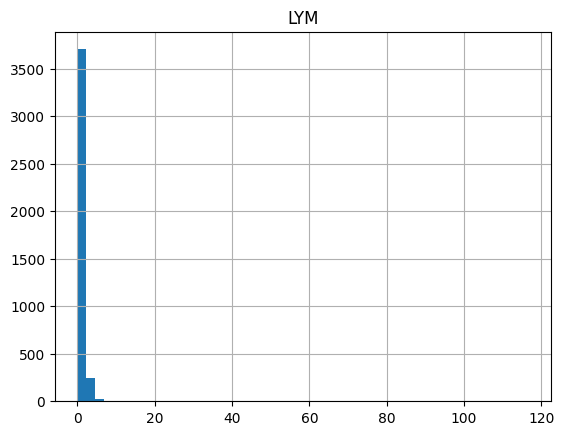

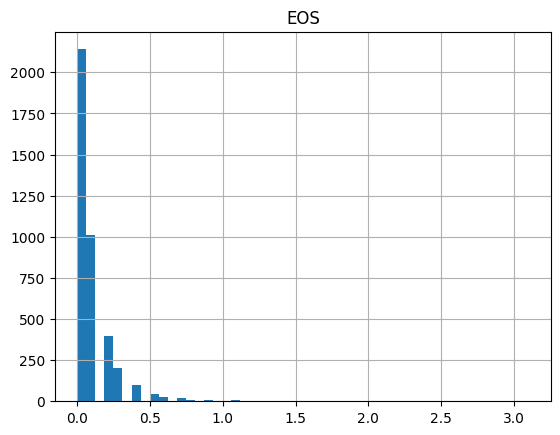

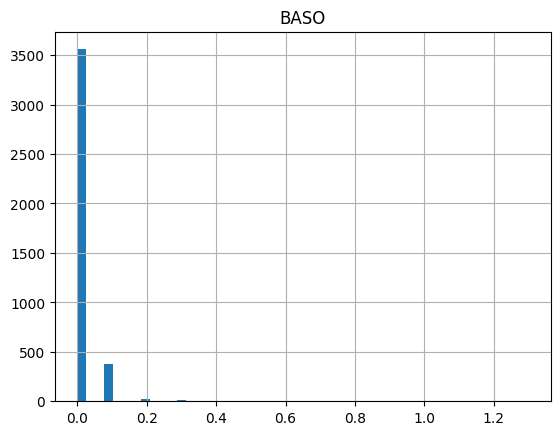

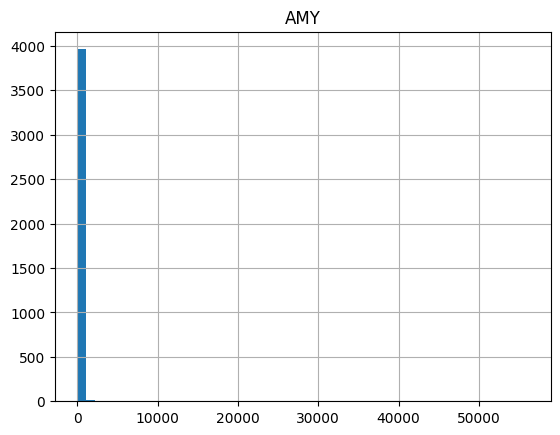

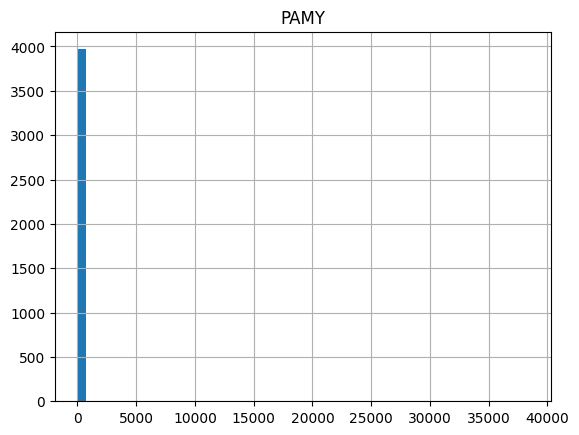

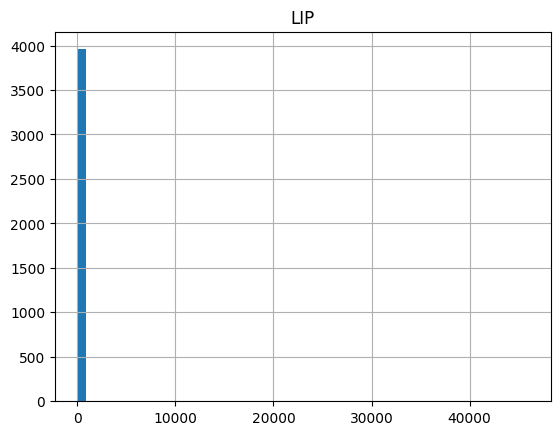

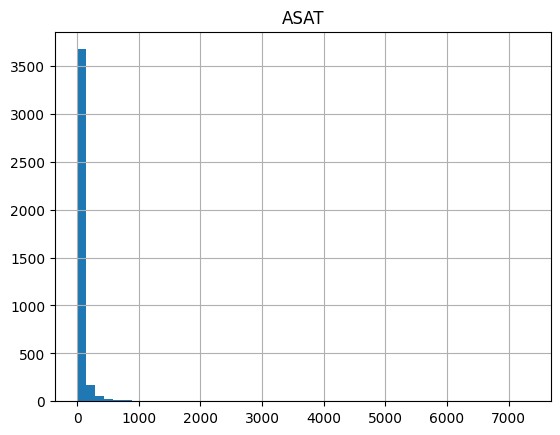

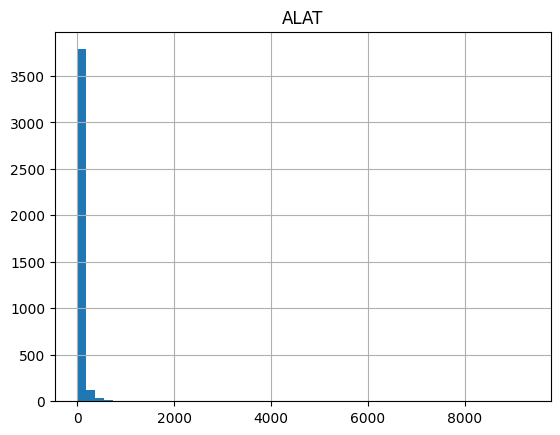

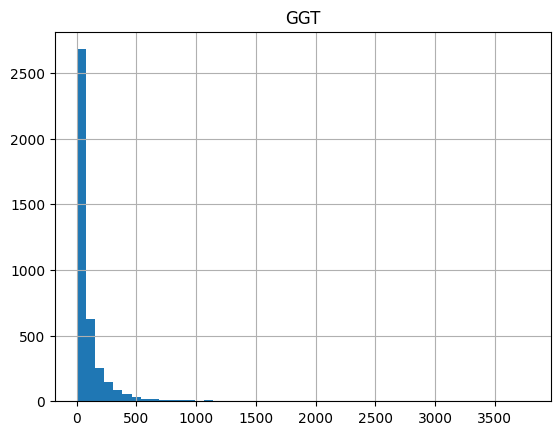

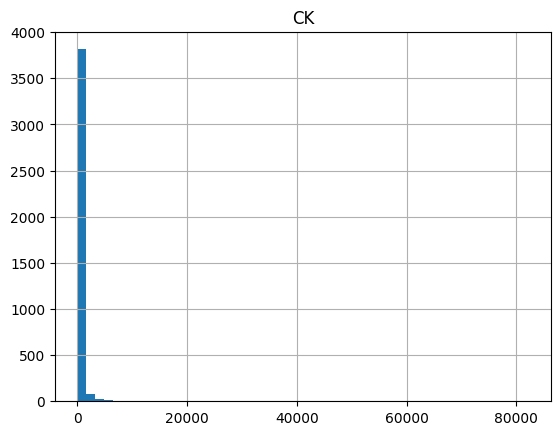

In [24]:
import matplotlib.pyplot as plt

for i in list_extreme: #features where std deviation is extreme
    pca_frame[i].hist(bins=50)
    plt.title(i)
    plt.show()

In [25]:
#frame_uni = frame_clean.drop(columns = ['SEX', 'BloodCulture'])

/tmp/ipykernel_376824/3559769186.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


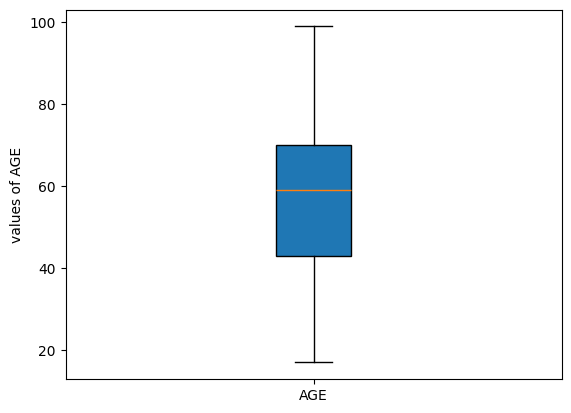

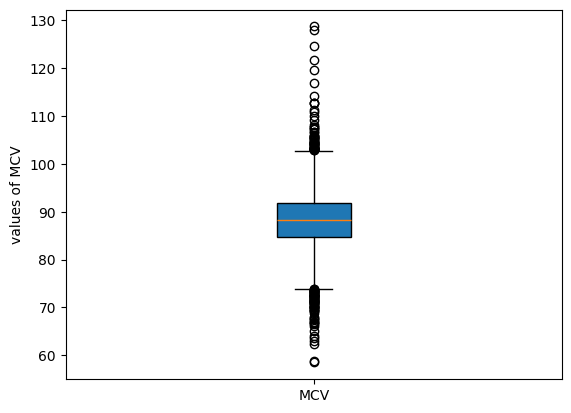

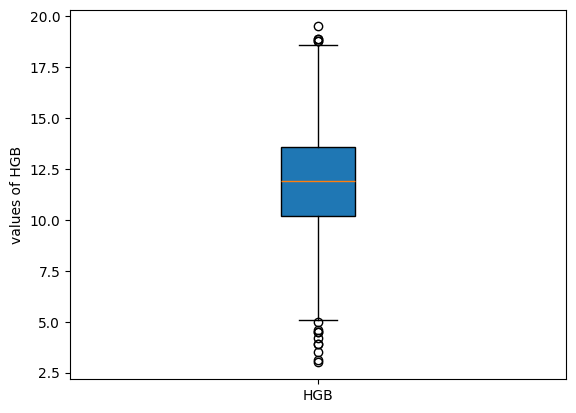

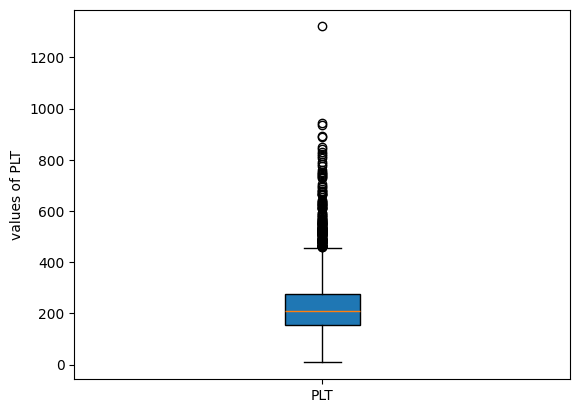

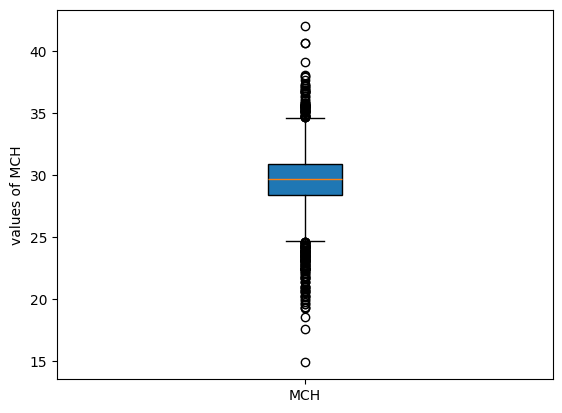

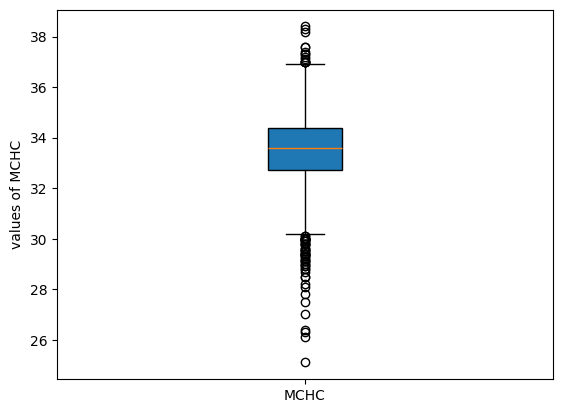

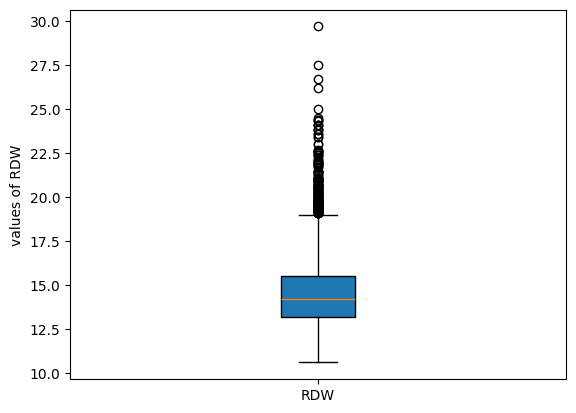

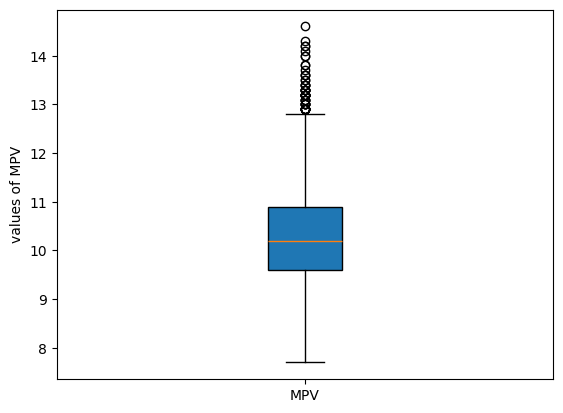

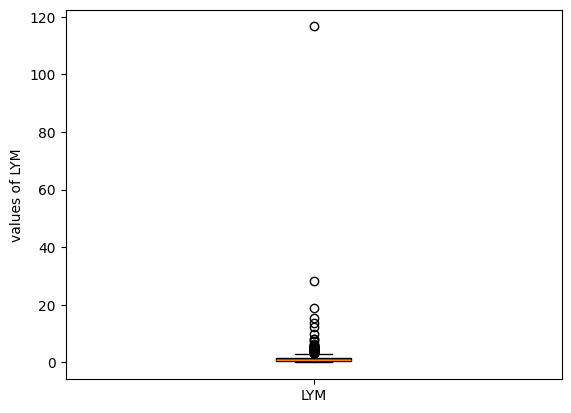

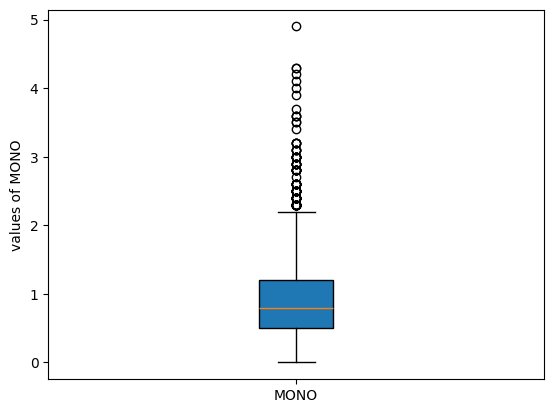

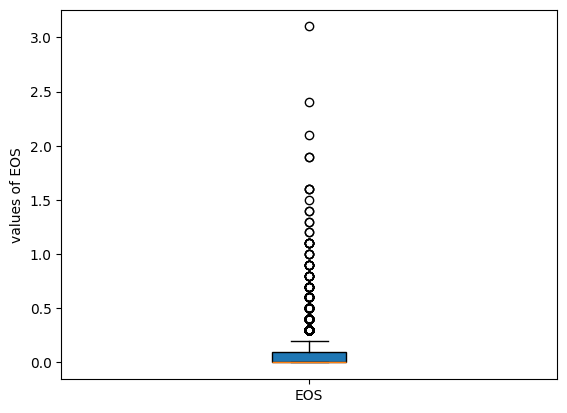

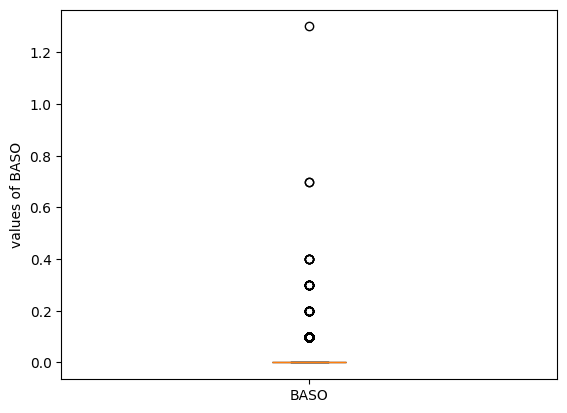

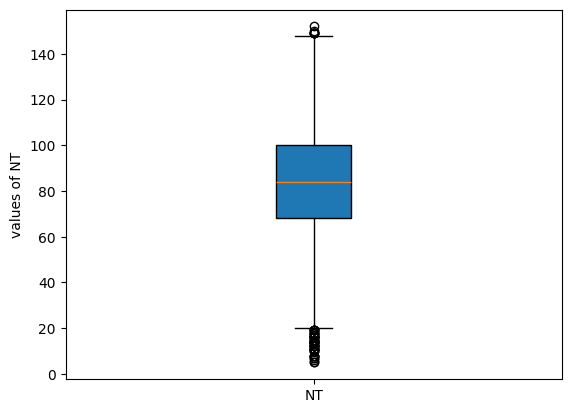

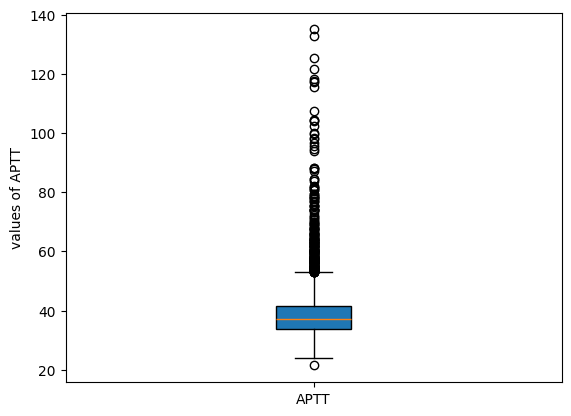

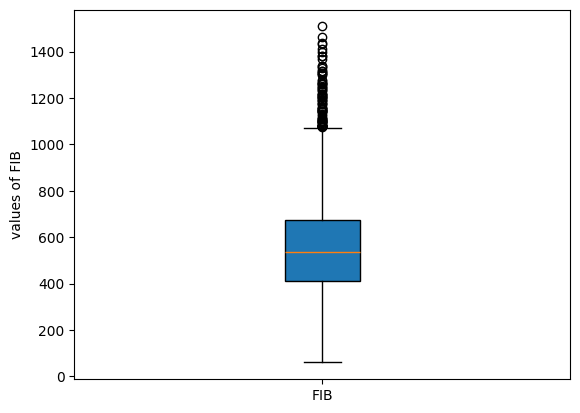

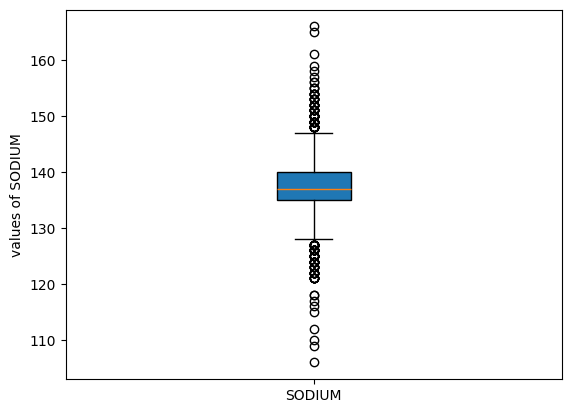

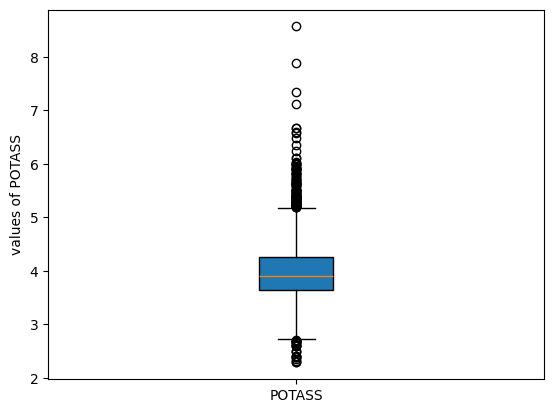

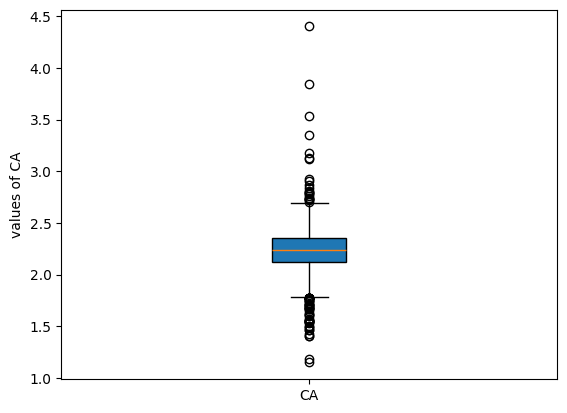

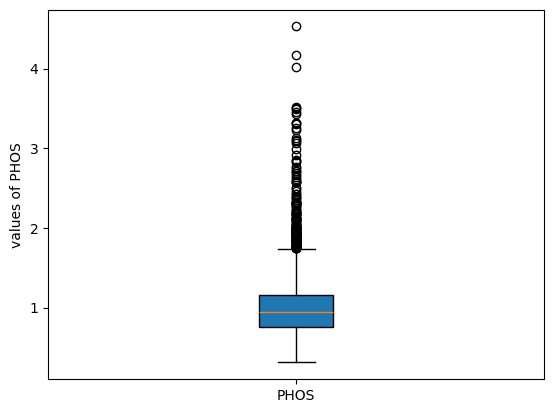

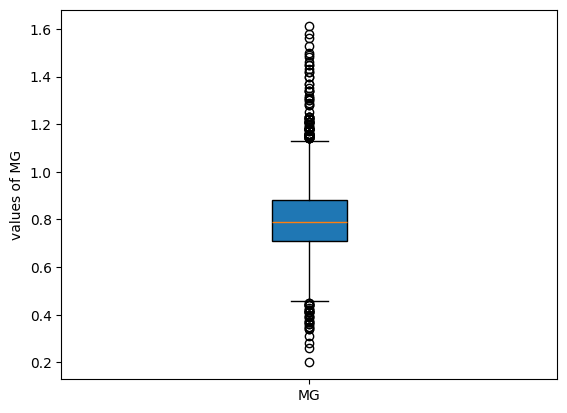

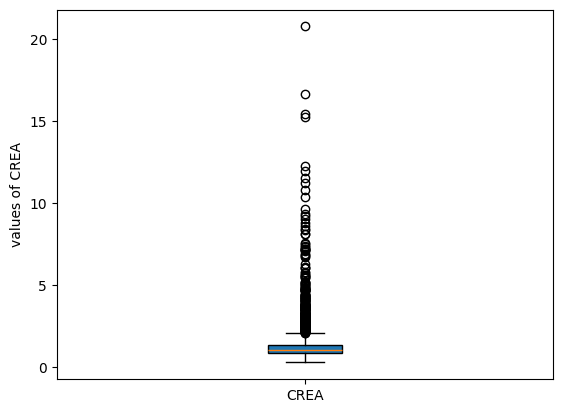

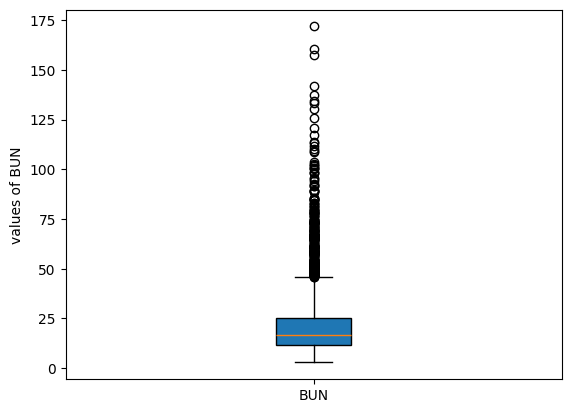

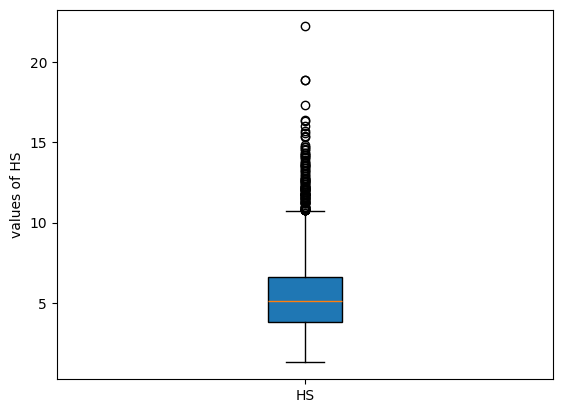

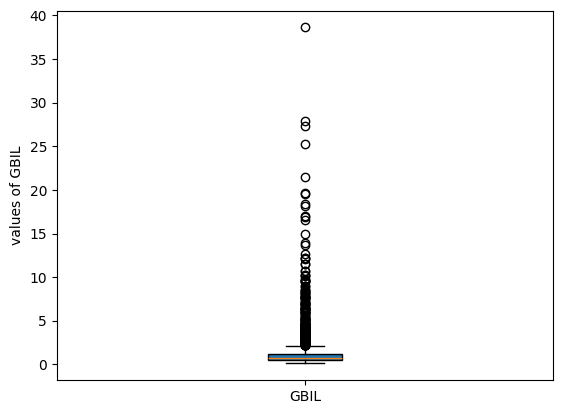

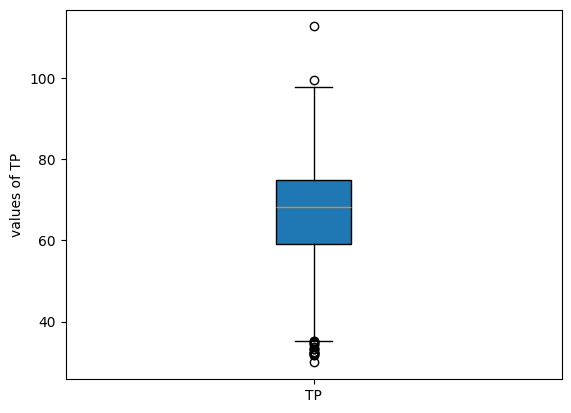

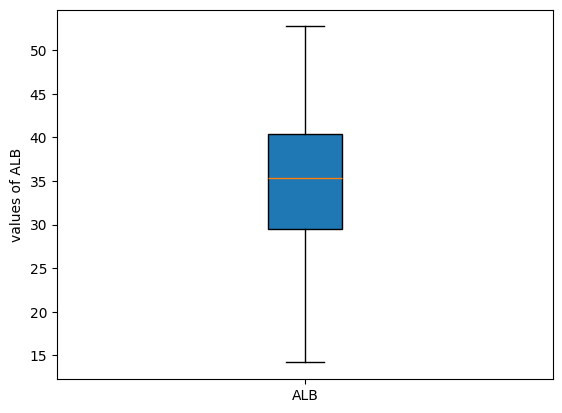

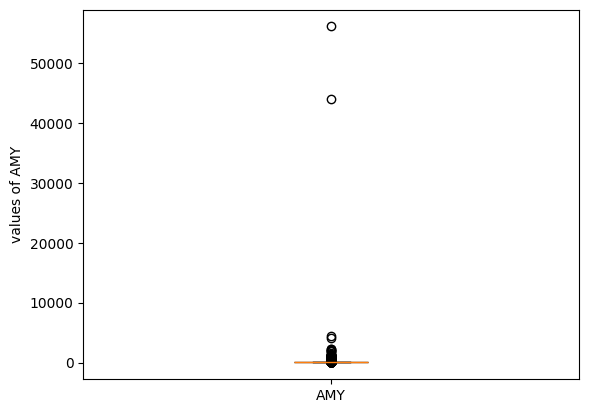

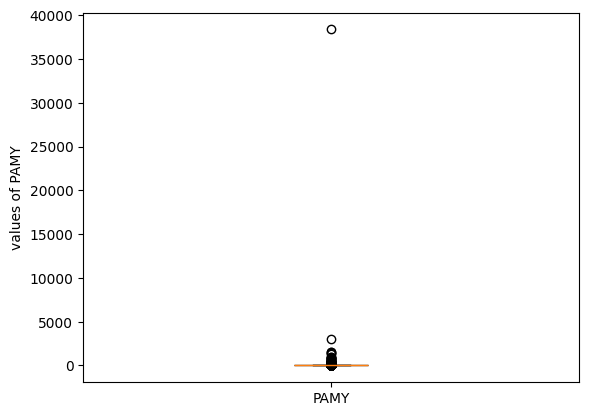

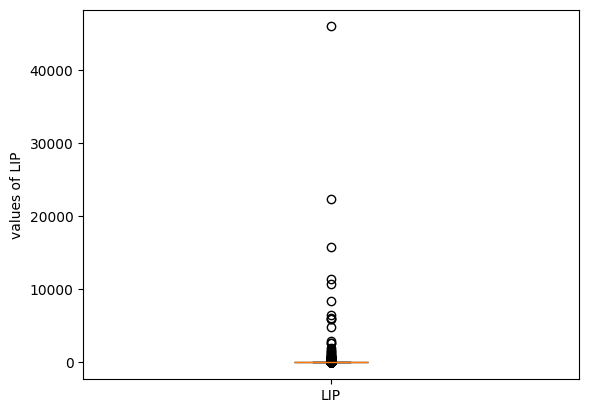

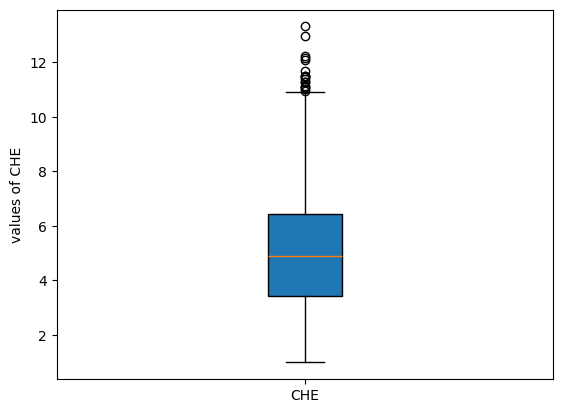

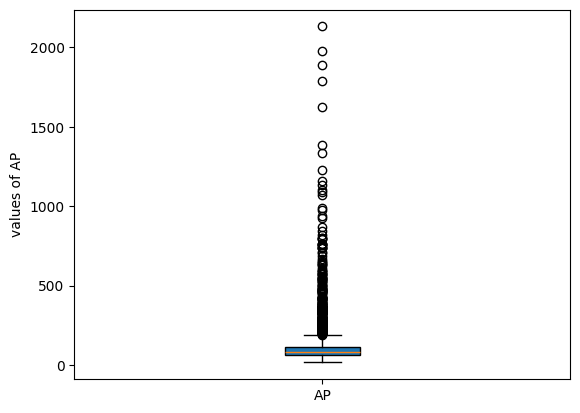

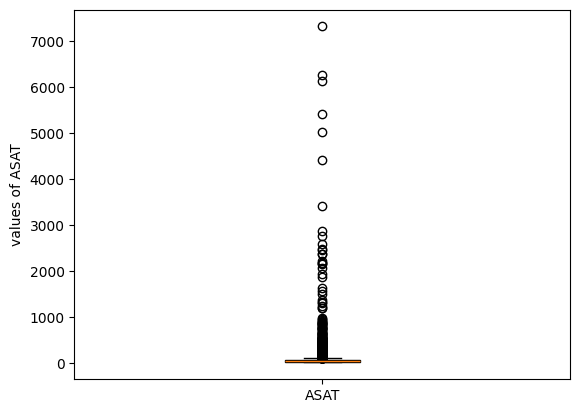

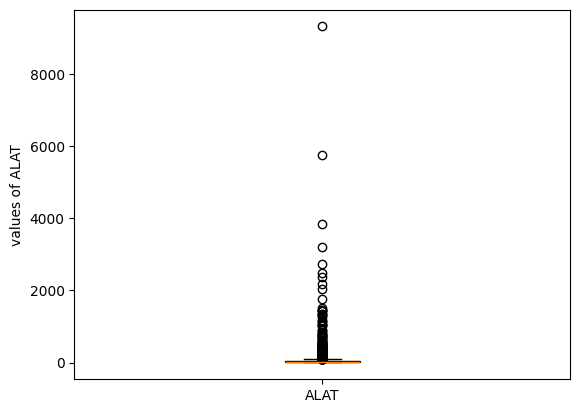

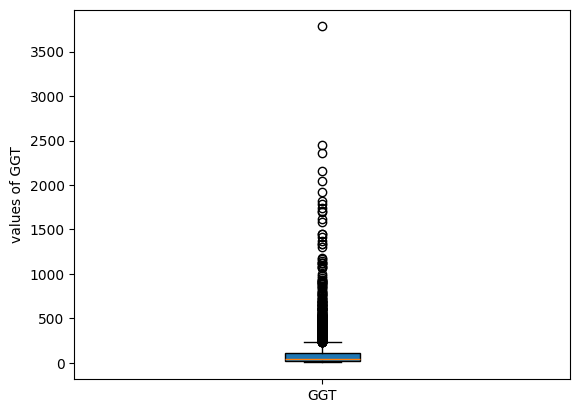

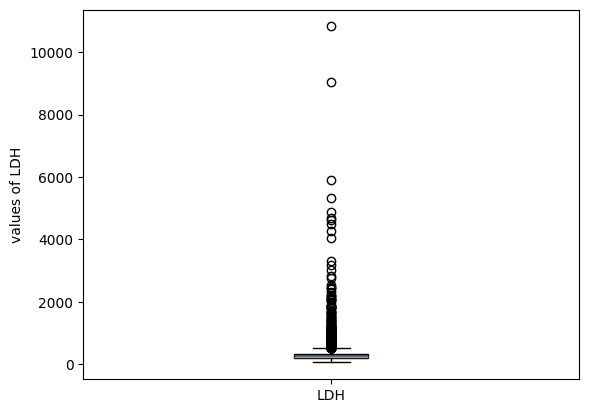

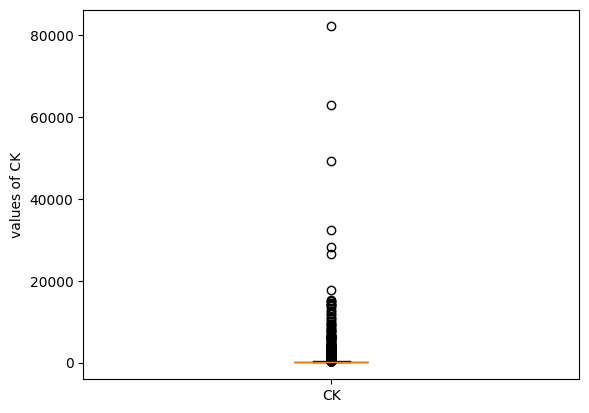

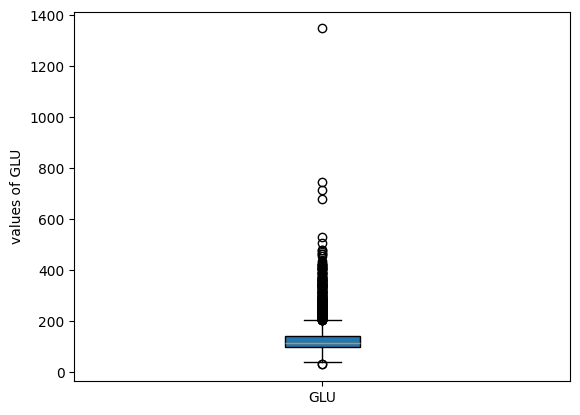

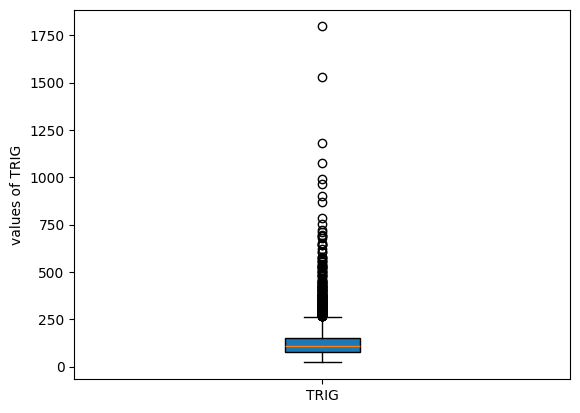

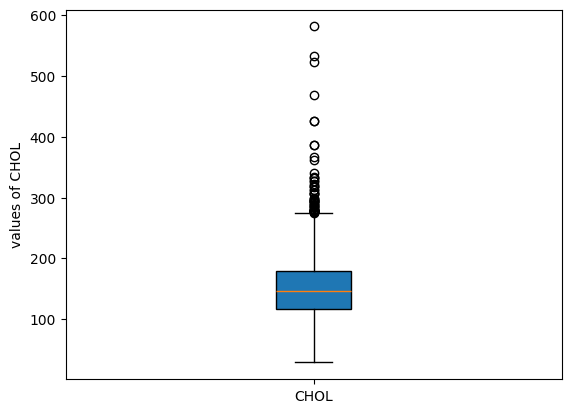

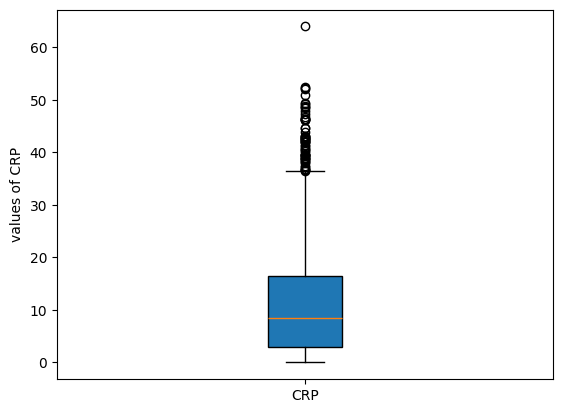

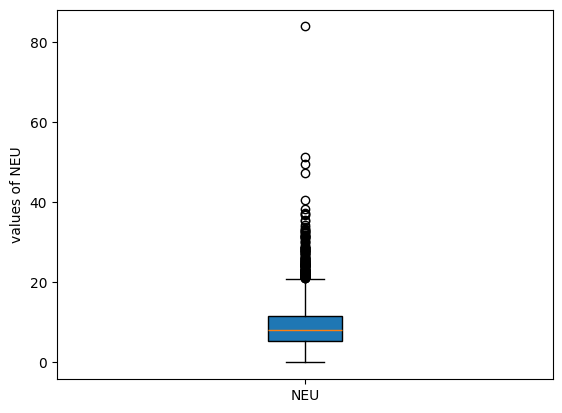

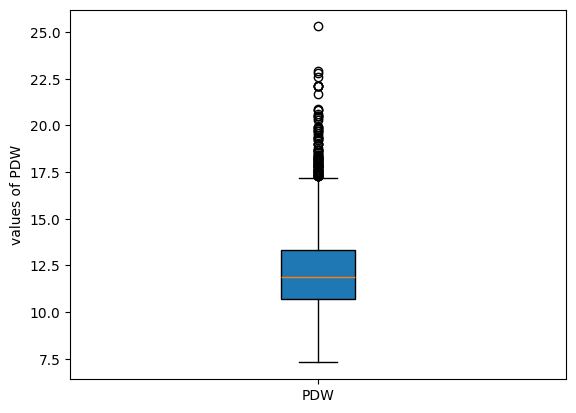

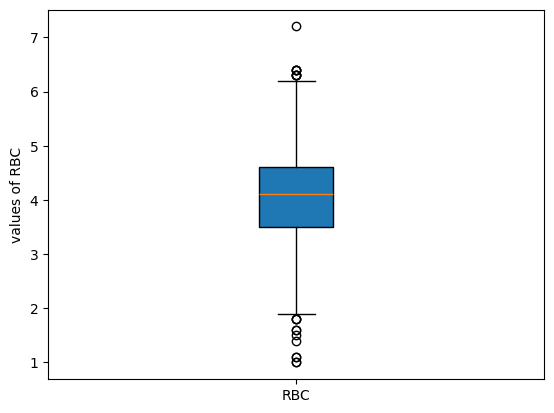

In [26]:
#frame_uni = frame_clean.drop(columns = ['SEX', 'BloodCulture'])
for i in pca_frame.columns:
    fig, ax = plt.subplots()
    ax.set_ylabel(f"values of {i}")
    bplot = ax.boxplot(pca_frame[i],
                       patch_artist=True,
                       tick_labels=[i]);

In [ ]:
#def highlight_extreme(df, color='red'):
    #"""enables ... """
    #for ind in pca_frame.index: 
        #for feature in pca_frame.columns:
            #value = pca_frame.loc[ind, feature]
            #if np.sqrt((value - float(pca_frame[feature].mean()))^2) >= np.std(pca_frame[feature]):
                #color = color
            #else: 
                #color = None
    #return f"color: {color}"

In [ ]:
#pca_frame.style.map(highlight_extreme, color='darkred')

In [ ]:
#pca_frame_more.loc[[0, 5546, 32665]].T #patient 0 est le patient moyen

In [ ]:
#mammalsCR = preprocessing.scale(mammals)
#pcaCR = PCA()
#pcaCR.fit(mammalsCR)
#ratios = pcaCR.explained_variance_ratio_

In [ ]:
#pca_frame = pca_frame.copy().drop(columns = ['AGE'])

### On a deja créée pca_frame plus haut ###
maintenant on fait l'ACP

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca_frame = pca_frame.copy().drop(columns = ['AGE'])
data = pca_frame.values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA()
pca_res = pca.fit(scaled_data) #resultats calculs de ACP
pca_res_t = pca_res.transform(scaled_data)

In [ ]:
#scaled_df = pd.DataFrame(data=scaled_data, index=pca_frame.index, columns=pca_frame.columns)
#scaled_df[:7]

In [28]:
pca_res_t = pca_res.transform(scaled_data) #coord des ind dans les PCi
pd.DataFrame(pca_res_t, index=pca_frame.index, columns=[f"PC{i}" for i in range(1, pca.n_components_ +1)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.202675,-0.139630,0.488687,0.627925,-0.143515,1.301016,0.985378,-0.920604,1.562032,-1.612855,...,0.432269,-0.025847,0.115660,0.768206,0.267274,0.138594,-0.869296,0.003845,-0.035669,-0.086285
7,-2.494960,2.374235,1.788346,0.086062,-1.477300,-1.930753,-0.936116,-3.908072,-1.604609,0.056623,...,-0.476857,0.453314,0.319896,0.166403,0.009438,0.851053,0.203572,0.028913,-0.114377,0.004235
10,0.289687,1.270354,-2.993037,-0.396187,1.287776,0.513860,0.074922,-1.106834,0.352608,-1.496626,...,0.366466,-0.501933,0.327101,-0.016008,-0.332826,-0.110981,-0.024828,-0.004116,0.325223,-0.039461
19,-1.791908,-0.830625,-2.449754,0.850505,-0.257903,-0.844288,0.799479,0.896219,0.563421,-0.067469,...,-0.192726,0.431632,0.205930,0.160035,-0.185601,-0.093564,-0.327747,0.046407,0.129800,0.074458
21,-2.277179,-0.261417,0.337181,-0.117487,0.100288,-0.883852,2.496646,0.355699,-0.173443,0.386076,...,-0.057488,0.684734,0.186937,0.666487,-0.161719,-0.013416,-0.511860,0.055579,-0.045679,-0.048142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62399,-3.440737,-0.850080,-2.038437,0.274832,-0.231946,-0.267174,-1.085294,0.396221,-0.319211,1.433761,...,0.061915,-1.022793,-0.269711,-0.194391,0.000932,-0.031826,0.016579,0.009485,-0.159268,-0.004802
62411,3.534915,0.489485,0.372392,0.623521,-0.674203,0.466293,-0.837124,-0.189529,-0.593652,-0.606508,...,0.340784,0.287933,0.003645,-0.135096,-0.124230,-0.189120,0.126813,0.030510,-0.017287,-0.044357
62420,-0.129996,-1.024364,-0.680812,0.676075,-0.096074,1.257514,0.677333,-1.257552,-0.333298,0.523952,...,-0.562102,0.542135,0.131498,0.057181,0.009855,0.004878,-0.045135,0.033698,0.016444,0.038057


### from documentation
.explained_variance_ \
"Equal to n_components largest eigenvalues of the covariance matrix of X

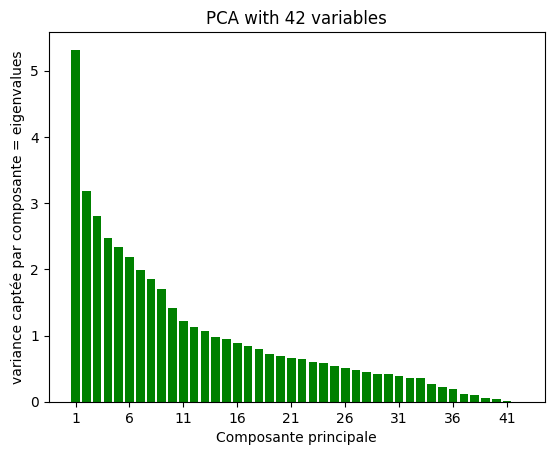

In [29]:
import matplotlib.pyplot as plt
# .explained_variance_
# "ndarray of shape (n_components,)
eigenv = pca_res.explained_variance_#[:25] #.explained_variance_
plt.bar(np.arange(1,len(eigenv)+1), eigenv, color='green')
plt.xticks(np.arange(1,len(eigenv)+1, 5), np.arange(1, len(eigenv)+1, 5))
plt.xlabel("Composante principale")
plt.ylabel("variance captée par composante = eigenvalues")
plt.title(f"PCA with {data.shape[-1]} variables");

### from documentation
.components_ \
ndarray of shape (n_components, n_features)\
Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by decreasing explained_variance_.

In [30]:
# .components_ ndarray of shape (n_components, n_features)
PC_names = [f"PC{i}" for i in range(1, len(pca.components_)+1)]
comp = pca.components_
#loadings means PC as a linear combination of original features
loadings = pd.DataFrame(comp, index=PC_names, columns=pca_frame.columns)

In [31]:
loadings[:3]

,MCV,HGB,PLT,MCH,MCHC,RDW,MPV,LYM,MONO,EOS,...,GGT,LDH,CK,GLU,TRIG,CHOL,CRP,NEU,PDW,RBC
PC1,-0.053479,0.315637,0.024007,0.019254,0.130998,-0.241232,-0.068307,0.013943,-0.032631,-0.044797,...,-0.098205,-0.112508,-0.046523,-0.014001,-0.048228,0.224741,-0.154775,-0.049619,-0.052112,0.309095
PC2,0.167021,0.239567,-0.155753,0.186183,0.098242,-0.070389,0.277015,0.048864,0.083238,-0.050226,...,0.077042,0.272336,0.104851,0.121484,0.090781,0.091434,-0.070109,0.106793,0.282210,0.164609
PC3,-0.239011,-0.030653,0.336722,-0.333608,-0.273570,0.139176,-0.194147,0.063974,0.142196,0.068222,...,-0.010904,0.006199,-0.025891,0.128152,0.072852,0.099038,0.114383,0.178856,-0.157950,0.109734


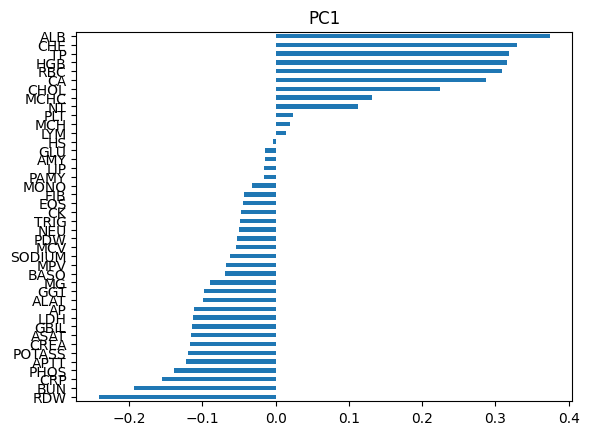

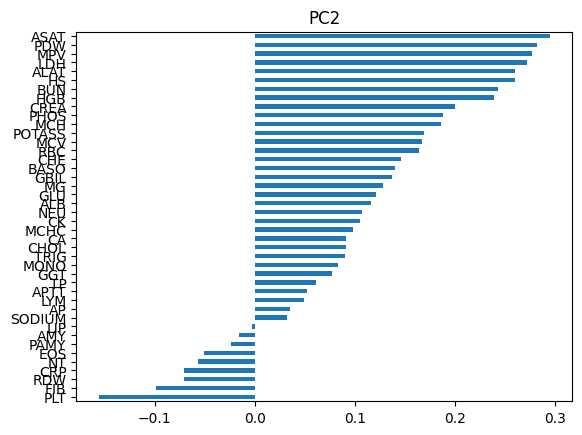

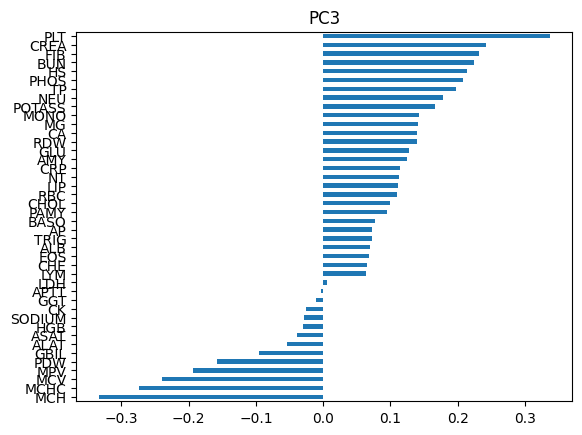

In [32]:
for i in loadings.index[:3]:
    loadings.loc[f"{i}"].sort_values().plot.barh()
    plt.title(f"{i}")
    plt.show()

In [ ]:
from sklearn.cluster import KMeans

array = []

for i in range(1,20):
    kmeans_i = KMeans(n_clusters=i, n_init=3, init='k-means++').fit(scaled_data)# random_state=42)
    inertie = kmeans_i.inertia_
    array.append(inertie)
plt.bar(range(1,20), array, color='violet');

In [ ]:
#from sklearn.metrics import DistanceMetric
#dist = DistanceMetric.get_metric('mahalanobis', V=np.cov(data))

In [ ]:
# le nombre de 2 groupes est cohérent avec notre connaissance des données : il y a des patients malades, d'autres non
kmeans = KMeans(n_clusters=2, n_init=1, init='k-means++').fit(scaled_data)
pred = kmeans.predict(scaled_data)
pred

/tmp/ipykernel_376824/3239838499.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax.scatter(pca_res_t[:,0], pca_res_t[:,1], pca_res_t[:,2], c=frame_clean.loc[:,'BloodCulture'].replace(dico), marker=".", alpha=0.6)#c=pred


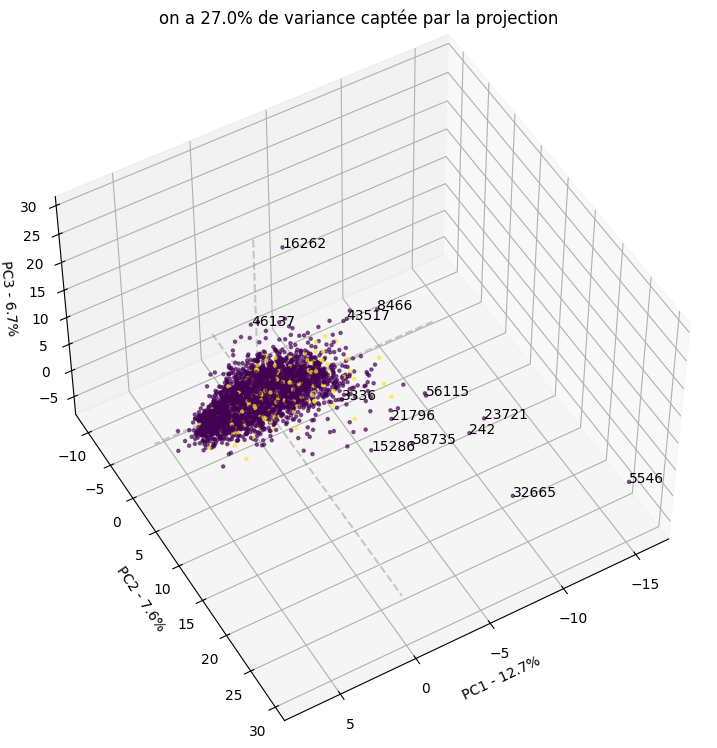

In [38]:
liste_outliers = [] #on fait une liste pour les outliers

fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=50, azim=60)

# La couleur des points dépend de leur étiquette 
ax.plot(np.arange(-12, 7.5),0, 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0,np.arange(-10, 30), 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0, 0, np.arange(-5, 30), linestyle='dashed', c='grey', alpha=0.4)

dico = {'yes':1, 'no':0} #faisons dict

ax.scatter(pca_res_t[:,0], pca_res_t[:,1], pca_res_t[:,2], c=frame_clean.loc[:,'BloodCulture'].replace(dico), marker=".", alpha=0.6)#c=pred

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")

for i in range(pca_res_t.shape[0]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(pca_res_t[i,:4]) > 13: #ind qui plus long vecteur dans ss espace defini par PC1, PC2, PC3
        ax.text(pca_res_t[i,0], pca_res_t[i,1], pca_res_t[i,2], s=pca_frame.index[i])
        liste_outliers.append(int(pca_frame.index[i]))
ax.set_title(f"on a {np.round(np.sum(pca_res.explained_variance_ratio_[:3])*100)}% de variance captée par la projection");

In [36]:
liste_outliers

[242,
 3336,
 5546,
 8466,
 15286,
 16262,
 21796,
 23721,
 32665,
 43517,
 46137,
 56115,
 58735]

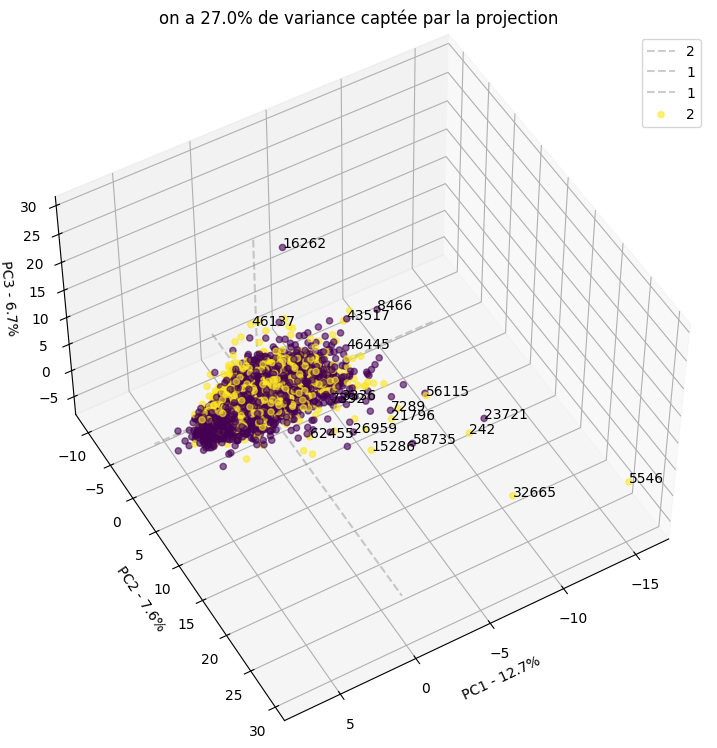

In [39]:
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=50, azim=60)

# La couleur des points dépend de leur étiquette 
ax.plot(np.arange(-12, 7.5),0, 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0,np.arange(-10, 30), 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0, 0, np.arange(-5, 30), linestyle='dashed', c='grey', alpha=0.4)

#dico = {1:"M", 2:"F"} 
ax.scatter(pca_res_t[:,0], pca_res_t[:,1], pca_res_t[:,2], c=frame_clean.loc[:,'SEX'], alpha=0.6)

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")

for i in range(pca_res_t.shape[0]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(pca_res_t[i,:5]) > 13: #ind qui plus long vecteur dans ss espace defini par PC1, PC2, PC3
        ax.text(pca_res_t[i,0], pca_res_t[i,1], pca_res_t[i,2], s=pca_frame.index[i])
ax.set_title(f"on a {np.round(np.sum(pca_res.explained_variance_ratio_[:3])*100)}% de variance captée par la projection")
ax.legend(frame_clean.loc[:,'SEX']);

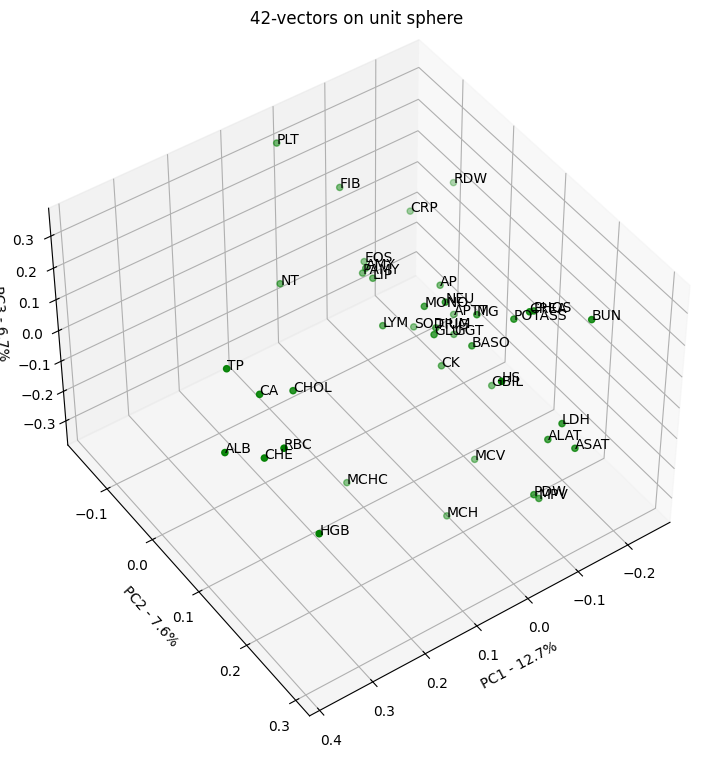

In [40]:
#projection des variables
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d', elev=45, azim=55)

# heads of the arrows with adjusted arrow head length
ax.scatter(comp[0,:], comp[1,:], comp[2,:], color='g')

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")

for r, i in enumerate(comp.T): #rank, iterated
    #if np.linalg.norm(i[:4]) > 0.3: #on inclue la 4eme PC
    ax.text(i[0], i[1], i[2], s=pca_frame.columns[r])
ax.set_title(f'{len(comp)}-vectors on unit sphere');

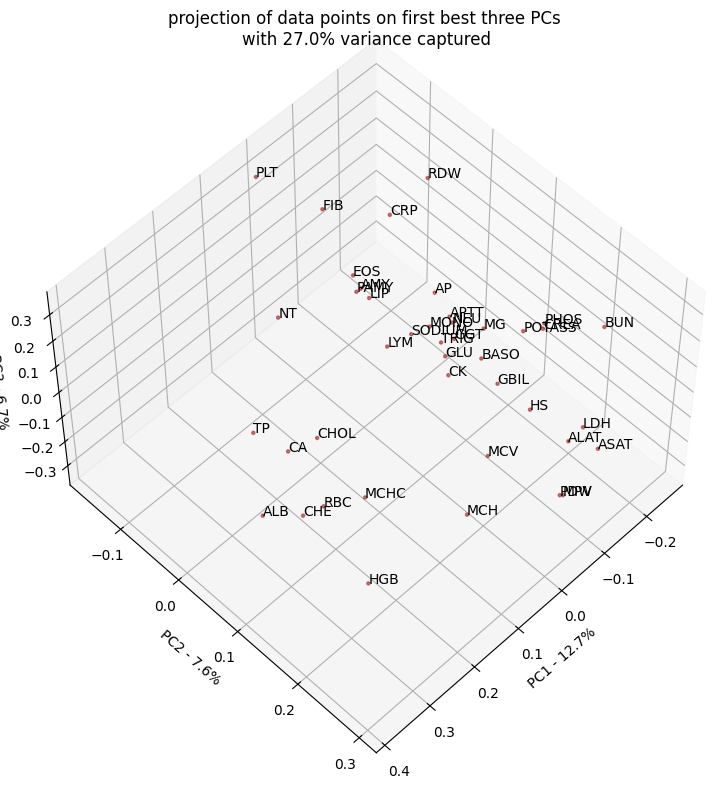

In [41]:
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=55, azim=45)


ax.scatter(comp[0,:], comp[1,:], comp[2,:], marker=".", alpha=0.6, color='brown')#c=table['BloodCulture'].replace({'yes':1, 'no':0})

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")
for r, i in enumerate(comp.T): #this part is based on a stackoverflow discussion
    ax.text(i[0], i[1], i[2], s=pca_frame.columns[r])
ax.set_title(f'projection of data points on first best three PCs \
\nwith {np.round(np.sum(pca_res.explained_variance_ratio_[0:3]*100))}% variance captured');

In [42]:
ccircle = []
eucl_dist = []
for i in pca_frame.T.values:
    corr1 = np.corrcoef(i,pca_res_t[:,0])[0,1]
    corr2 = np.corrcoef(i,pca_res_t[:,1])[0,1]
    corr3 = np.corrcoef(i,pca_res_t[:,2])[0,1]
    ccircle.append((corr1, corr2, corr3))
    eucl_dist.append(np.linalg.norm(np.array([corr1, corr2, corr3])))

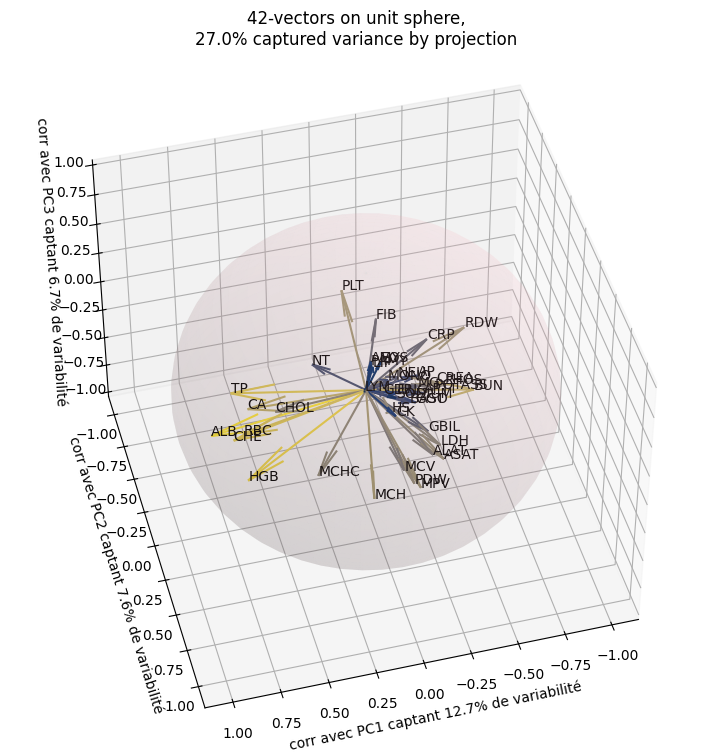

In [43]:
# sphere des correlations
# cette cellule fondée sur une discussion
# https://nirpyresearch.com/pca-correlation-circle/ (Daniel Pellicia)
# https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector

fig = plt.figure(figsize=(9, 9))
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(111, projection='3d', elev=45, azim=75)
# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="pink", alpha=0.1)


# a random array of 3D coordinates in [-1,1]
ccircle = np.array(ccircle)
# tails of the arrows
tails= np.zeros(len(ccircle))
colors = []
for i in eucl_dist:
    arrow_col_i = plt.cm.cividis((i - np.array(eucl_dist).min())/\
                                (np.array(eucl_dist).max() - np.array(eucl_dist).min()) )
    colors.append(arrow_col_i)
# heads of the arrows with adjusted arrow head length
ax.quiver(tails,tails,tails,ccircle[:,0], ccircle[:,1], ccircle[:,2], color=colors)

ax.set_xlabel(f"corr avec PC1 captant {100*pca_res.explained_variance_ratio_[0]:.1f}% de variabilité")
ax.set_ylabel(f"corr avec PC2 captant {100*pca_res.explained_variance_ratio_[1]:.1f}% de variabilité")
ax.set_zlabel(f"corr avec PC3 captant {100*pca_res.explained_variance_ratio_[2]:.1f}% de variabilité")
#some_list = []
for r, i in enumerate(ccircle): #rank, iterated
    ax.text(i[0], i[1], i[2], s=pca_frame.columns[r])
    #some_list.append((pca_frame2.columns[r], (np.round(coef2[r,0],2), np.round(coef2[r,1],2), np.round(coef2[r,2],2))))

ax.set_title(f'{len(ccircle)}-vectors on unit sphere,\
\n{np.round(np.sum(pca_res.explained_variance_ratio_[:3])*100)}% captured variance by projection');

In [44]:
import random
random.seed("reussite")
chosen_var = random.sample(list(pca_frame.columns), 15)
chosen_var

['EOS',
 'TP',
 'PHOS',
 'BUN',
 'ALAT',
 'LYM',
 'RBC',
 'SODIUM',
 'MCHC',
 'NEU',
 'HGB',
 'GBIL',
 'FIB',
 'HS',
 'AP']

In [45]:
liste_ind_clean = list(frame_clean.index)

In [46]:
# a ré-évaluer : comment gérer les outliers?
corbeille = []
for idx, i in enumerate(liste_ind_clean):
    if i in liste_outliers:
        removed = liste_ind_clean.pop(idx)
        corbeille.append(removed)
corbeille == liste_outliers

True

In [47]:
#valeurs non centrées réduites
frame_r = frame_clean.copy().loc[liste_ind_clean,chosen_var + ['SEX', 'AGE', 'BloodCulture']]
frame_r.to_csv('frame_r.csv')

### Et une de plus
une dernière ACP pour comparer si les pré-traitements ont changé qqchose

In [49]:
#pca again but without gross outliers
pca_frame = pca_frame.copy().loc[liste_ind_clean]
data = pca_frame.values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA()
pca_res = pca.fit(scaled_data) #résultats calculs de ACP
pca_res_t = pca_res.transform(scaled_data)
comp = pca.components_

In [50]:
comp

array([[-5.95864198e-02,  3.12985269e-01,  3.16660766e-02, ...,
        -3.99606135e-02, -5.33601777e-02,  3.09980000e-01],
       [ 1.99997018e-01,  2.44958011e-01, -2.01646708e-01, ...,
         5.89483881e-02,  2.96337683e-01,  1.47941742e-01],
       [-1.78759437e-01,  2.31036126e-03,  2.80398058e-01, ...,
         2.06454628e-01, -7.73243545e-02,  1.20371358e-01],
       ...,
       [ 3.23127124e-02, -2.06732959e-02,  1.45795533e-02, ...,
        -7.35741178e-03,  7.04488773e-01, -2.12953481e-02],
       [-1.22137736e-01,  7.01111596e-01, -3.95646569e-03, ...,
        -1.48861143e-03,  4.56023764e-03, -6.83612197e-01],
       [-6.02835642e-01, -2.30848879e-03, -1.06007925e-03, ...,
         2.52168246e-04, -5.13750968e-03,  3.86067940e-03]],
      shape=(42, 42))

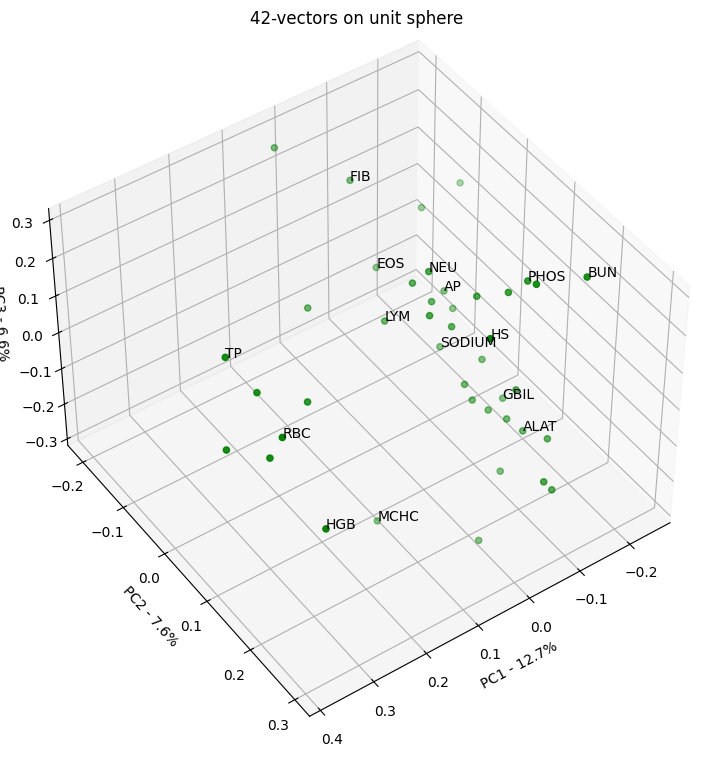

In [53]:
#projection des variables
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d', elev=45, azim=55)

# heads of the arrows with adjusted arrow head length
ax.scatter(comp[0,:], comp[1,:], comp[2,:], color='g')

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")

for r, i in enumerate(comp.T): #rank, iterated
    if pca_frame.columns[r] in chosen_var:
        ax.text(i[0], i[1], i[2], s=pca_frame.columns[r])
ax.set_title(f'{len(comp)}-vectors on unit sphere');

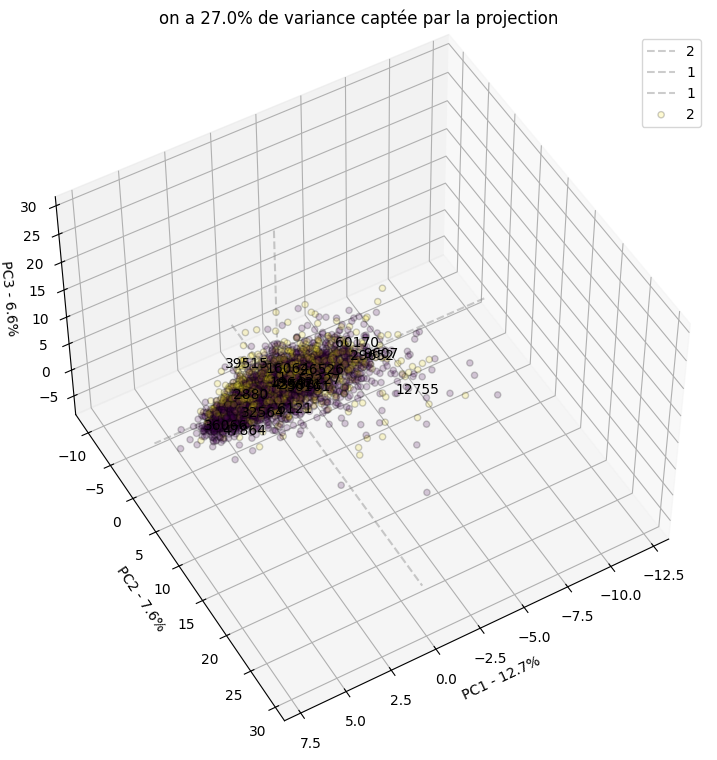

In [63]:
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=50, azim=60)

# La couleur des points dépend de leur étiquette 
ax.plot(np.arange(-12, 7.5),0, 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0,np.arange(-10, 30), 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0, 0, np.arange(-5, 30), linestyle='dashed', c='grey', alpha=0.4)

#dico = {1:"M", 2:"F"} 
ax.scatter(pca_res_t[:,0], pca_res_t[:,1], pca_res_t[:,2], c=frame_clean.loc[liste_ind_clean,'SEX'], alpha=0.2, edgecolors='black')

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")

for i in range(pca_res_t.shape[0])[::224]: #this part is based on a stackoverflow discussion
    #if np.linalg.norm(pca_res_t[i,:4]) > 13: #ind qui plus long vecteur dans ss espace defini par PC1, PC2, PC3
    ax.text(pca_res_t[i,0], pca_res_t[i,1], pca_res_t[i,2], s=pca_frame.index[i])
ax.set_title(f"on a {np.round(np.sum(pca_res.explained_variance_ratio_[:3])*100)}% de variance captée par la projection")
ax.legend(frame_clean.loc[:,'SEX']);

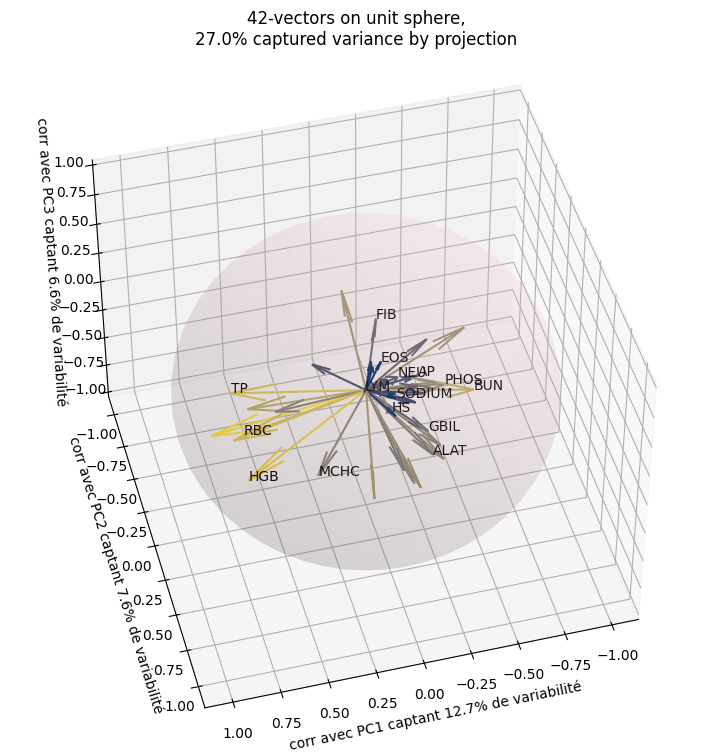

In [65]:
# sphere des correlations
# cette cellule fondée sur une discussion
# https://nirpyresearch.com/pca-correlation-circle/ (Daniel Pellicia)
# https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector

fig = plt.figure(figsize=(9, 9))
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(111, projection='3d', elev=45, azim=75)
# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="pink", alpha=0.1)


# a random array of 3D coordinates in [-1,1]
ccircle = np.array(ccircle)
# tails of the arrows
tails= np.zeros(len(ccircle))
colors = []
for i in eucl_dist:
    arrow_col_i = plt.cm.cividis((i - np.array(eucl_dist).min())/\
                                (np.array(eucl_dist).max() - np.array(eucl_dist).min()) )
    colors.append(arrow_col_i)
# heads of the arrows with adjusted arrow head length
ax.quiver(tails,tails,tails,ccircle[:,0], ccircle[:,1], ccircle[:,2], color=colors)

ax.set_xlabel(f"corr avec PC1 captant {100*pca_res.explained_variance_ratio_[0]:.1f}% de variabilité")
ax.set_ylabel(f"corr avec PC2 captant {100*pca_res.explained_variance_ratio_[1]:.1f}% de variabilité")
ax.set_zlabel(f"corr avec PC3 captant {100*pca_res.explained_variance_ratio_[2]:.1f}% de variabilité")
#some_list = []
for r, i in enumerate(ccircle): 
    if pca_frame.columns[r] in chosen_var:#rank, iterated
        ax.text(i[0], i[1], i[2], s=pca_frame.columns[r])
    #some_list.append((pca_frame2.columns[r], (np.round(coef2[r,0],2), np.round(coef2[r,1],2), np.round(coef2[r,2],2))))

ax.set_title(f'{len(ccircle)}-vectors on unit sphere,\
\n{np.round(np.sum(pca_res.explained_variance_ratio_[:3])*100)}% captured variance by projection');